# Initial Steps

## Install Dependencies

In [82]:
# !pip install openai
# !python -m pip install python-dotenv
# !pip install readline
# !pip install panel
# !pip install --upgrade langchain
# !pip install pypdf
# !pip install yt-dlp -U
# !pip install pydub
# !pip install tiktoken
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 KB 2.2 MB/s eta 0:00:002.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 7.6 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 KB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.1 MB/s et

## Setup

In [1]:
import json
with open("../config.json") as f:
    config = json.load(f)

# Chat with unstructured data of various formats

## Intoduction to RAG

In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution.
This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc).

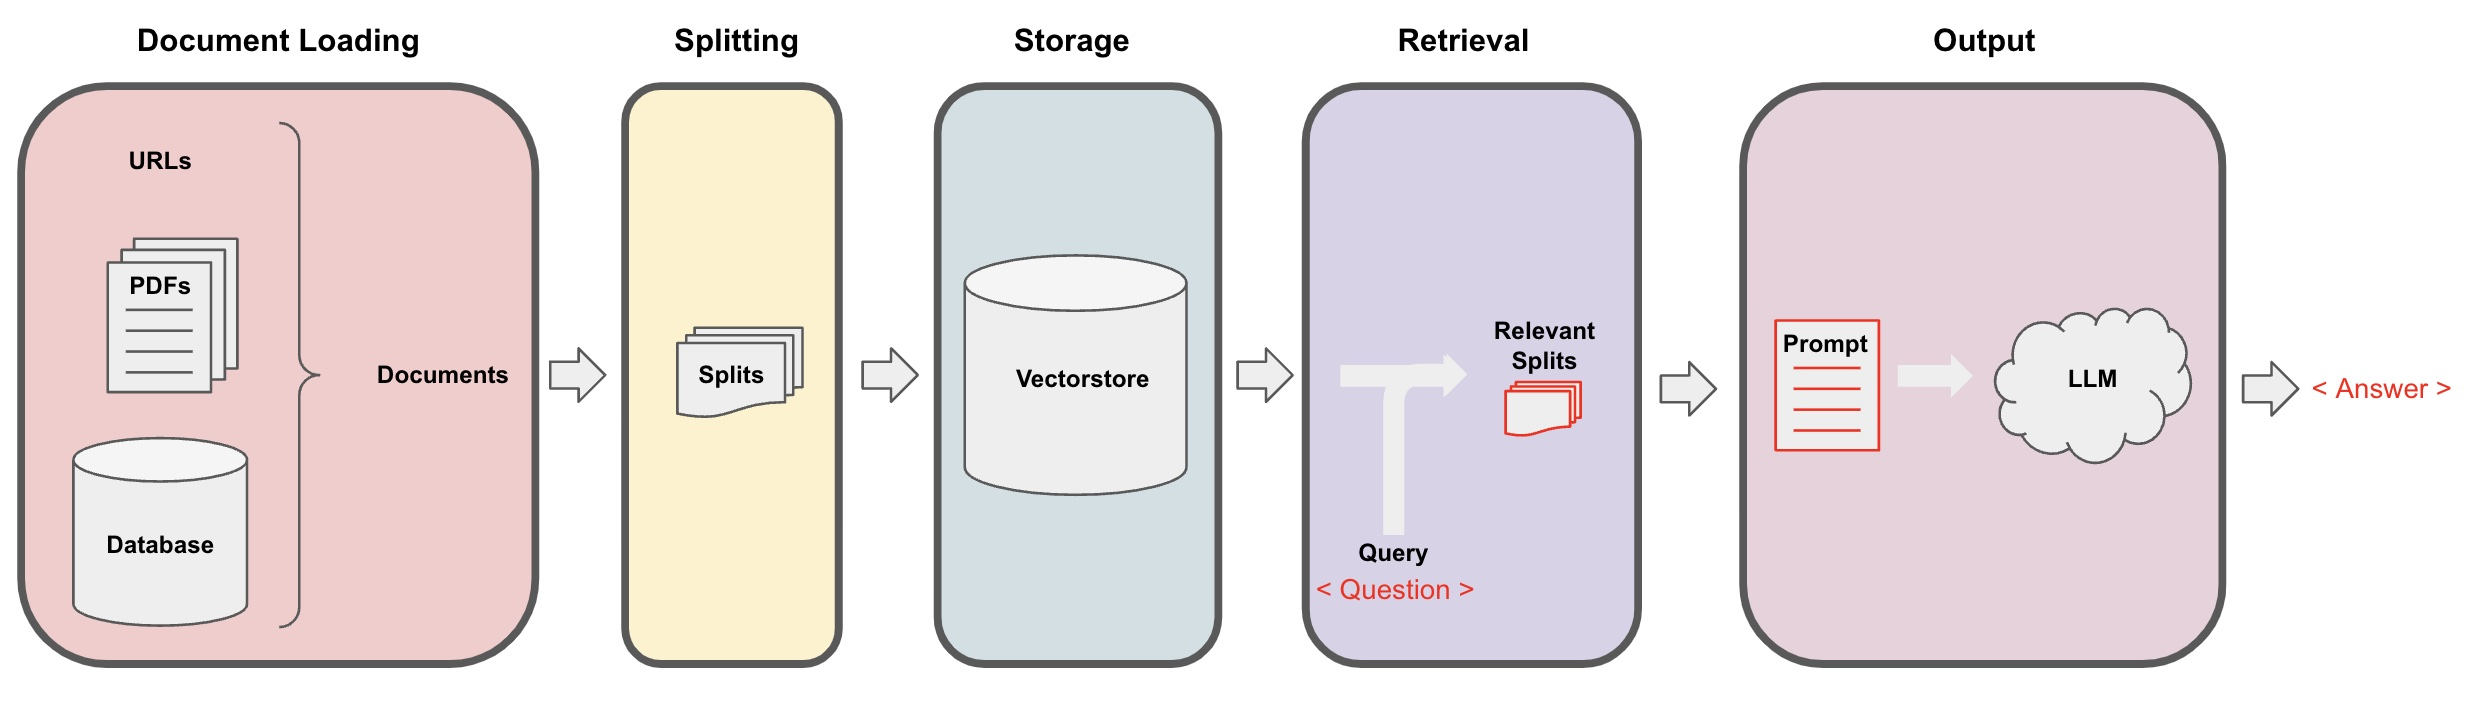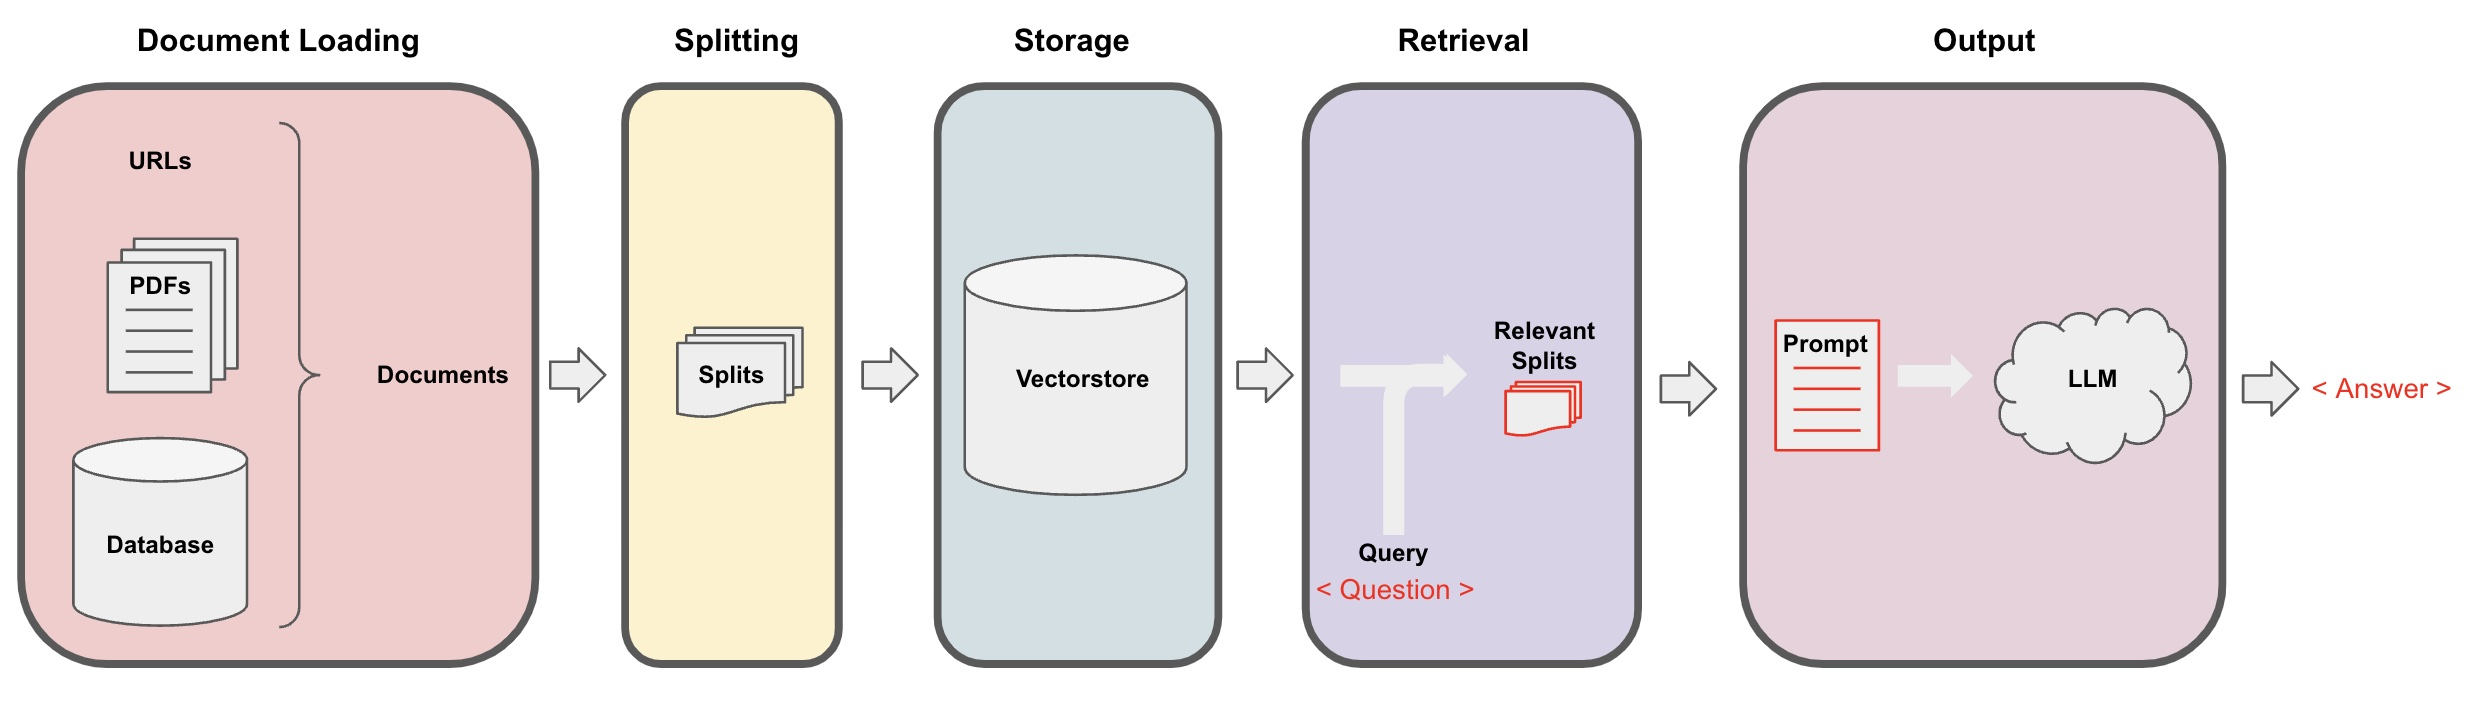

## Document Loading

### PDFs

In [5]:
from langchain.document_loaders import PyPDFLoader

In [12]:
# use pdf loader to laod the pdf file

loader = PyPDFLoader("sample_data/algo_cormen.pdf")
pages = loader.load()

Each page is a Document.
A Document contains text (page_content) and metadata.

In [13]:
len(pages)

1313

In [19]:
# Get the first page of the document and print the first 300 characters of it

page = pages[0]
print(page.page_content[:300])

ALGORITHMSINTRODUCTION TO
THIRD EDITIONTHOMAS H .  
CHARLES E.       
RONALD L .  
CLIFFORD STEINRIVESTLEISERSONCORMEN


In [20]:
# Ge the page meta data

page.metadata

{'source': 'sample_data/algo_cormen.pdf', 'page': 0}

### YouTube

In [22]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [27]:
# get the text from the youtube video

url="https://www.youtube.com/watch?v=jGwO_UgTS7I"
save_dir="sample_data/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser()
)
docs = loader.load()

In [ ]:
docs[0].page_content[0:500]

### URLs

In [34]:
# Load from the URL

from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://frappeframework.com/docs/user/en/tutorial/doctype-features")
docs = loader.load()

In [36]:
print(docs[0].page_content)









DocType Features





























































































































































































































































































































































































































































































































































































































































































































































































































































Search
/





			Docs
		



			Reviews
		



			Tutorial
		



			GitHub
		



			Learn
		







Getting Started














			Introduction
		

## Document Splitting

### Example

In [2]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [37]:
chunk_size =26
chunk_overlap = 4

In [40]:
# Initiate recursive and character text splitter

r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [41]:
text1 = 'abcdefghijklmnopqrstuvwxyz'

In [42]:
r_splitter.split_text(text1)

['abcdefghijklmnopqrstuvwxyz']

In [43]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [45]:
# Here we can see the 4 overlapping characters
r_splitter.split_text(text2)

['abcdefghijklmnopqrstuvwxyz', 'wxyzabcdefg']

### Perform splitting on pdf file

In [48]:
# load the pdf file
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("sample_data/algo_cormen.pdf")
pages = loader.load()

In [64]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len
)

In [59]:
docs = text_splitter.split_documents(pages)

In [60]:
len(docs)

1919

In [61]:
docs[31].page_content

'tion in databases, and developing tools for data analysis. Each of these steps\nrequires sophisticated algorithms. Although the solutions to the various prob-lems involved are beyond the scope of this book, many methods to solve thesebiological problems use ideas from several of the chapters in this book, therebyenabling scientists to accomplish tasks while using resources efﬁciently. Thesavings are in time, both human and machine, and in money, as more informa-tion can be extracted from laboratory techniques.\n/SIThe Internet enables people all around the world to quickly access and retrievelarge amounts of information. With the aid of clever algorithms, sites on theInternet are able to manage and manipulate this large volume of data. Examplesof problems that make essential use of algorithms include ﬁnding good routeson which the data will travel (techniques for solving such problems appear in'

In [56]:
docs[32].page_content

'xviii Preface\nWeb site\nYou can use our Web site, http://mitpress.mit.edu/algorithms/, to obtain supple-\nmentary information and to communicate with us. The Web site links to a list ofknown errors, solutions to selected exercises and problems, and (of course) a listexplaining the corny professor jokes, as well as other content that we might add.The Web site also tells you how to report errors or make suggestions.\nHow we produced this book\nLike the second edition, the third edition was produced in L\nATEX2". We used the\nTimes font with mathematics typeset using the MathTime Pro 2 fonts. We thankMichael Spivak from Publish or Perish, Inc., Lance Carnes from Personal TeX,Inc., and Tim Tregubov from Dartmouth College for technical support. As in theprevious two editions, we compiled the index using Windex, a C program that wewrote, and the bibliography was produced with B\nIBTEX. The PDF ﬁles for this\nbook were created on a MacBook running OS 10.5.'

## Vectorstores and Embeddings

### Introduction

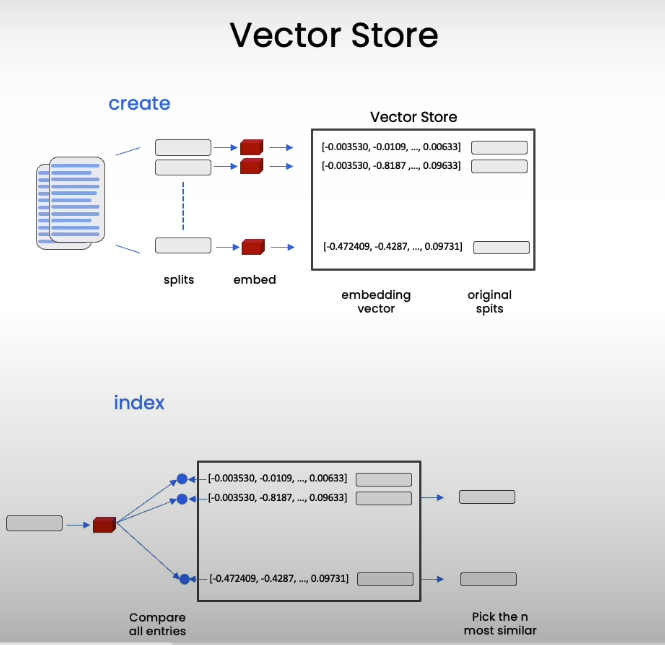

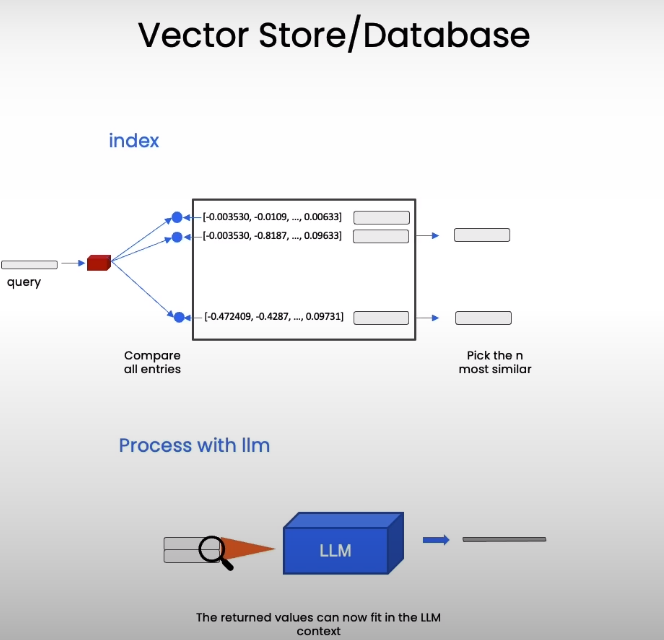

### Embeddings

In [66]:
# Split
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150
)

In [67]:
splits = text_splitter.split_documents(docs)

In [68]:
len(splits)

2954

In [71]:
from langchain.embeddings.openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings(openai_api_key = config['openai_api_key'])

In [79]:
sentence1 = "i like dogs"
sentence2 = "i like canines"
sentence3 = "i like dogs"

In [80]:
embedding1 = embedding.embed_query(sentence1)
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

In [76]:
import numpy as np

In [77]:
np.dot(embedding1, embedding2)

0.9631227500523626

In [81]:
np.dot(embedding1, embedding3)

1.0000000000000004

### Vectorstores

In [83]:
from langchain.vectorstores import Chroma

In [84]:
persist_directory = 'sample_data/chroma/'

In [85]:
!rm -rf ./sample_data/chroma  # remove old database files if any

In [86]:
vectordb = Chroma.from_documents(
    documents=splits,
    embedding=embedding,
    persist_directory=persist_directory
)

In [87]:
print(vectordb._collection.count())

2954


In [92]:
question = "what is dog"

In [93]:
docs = vectordb.similarity_search(question,k=3)

In [94]:
len(docs)

3

In [95]:
docs[0].page_content

'III Data Structures'